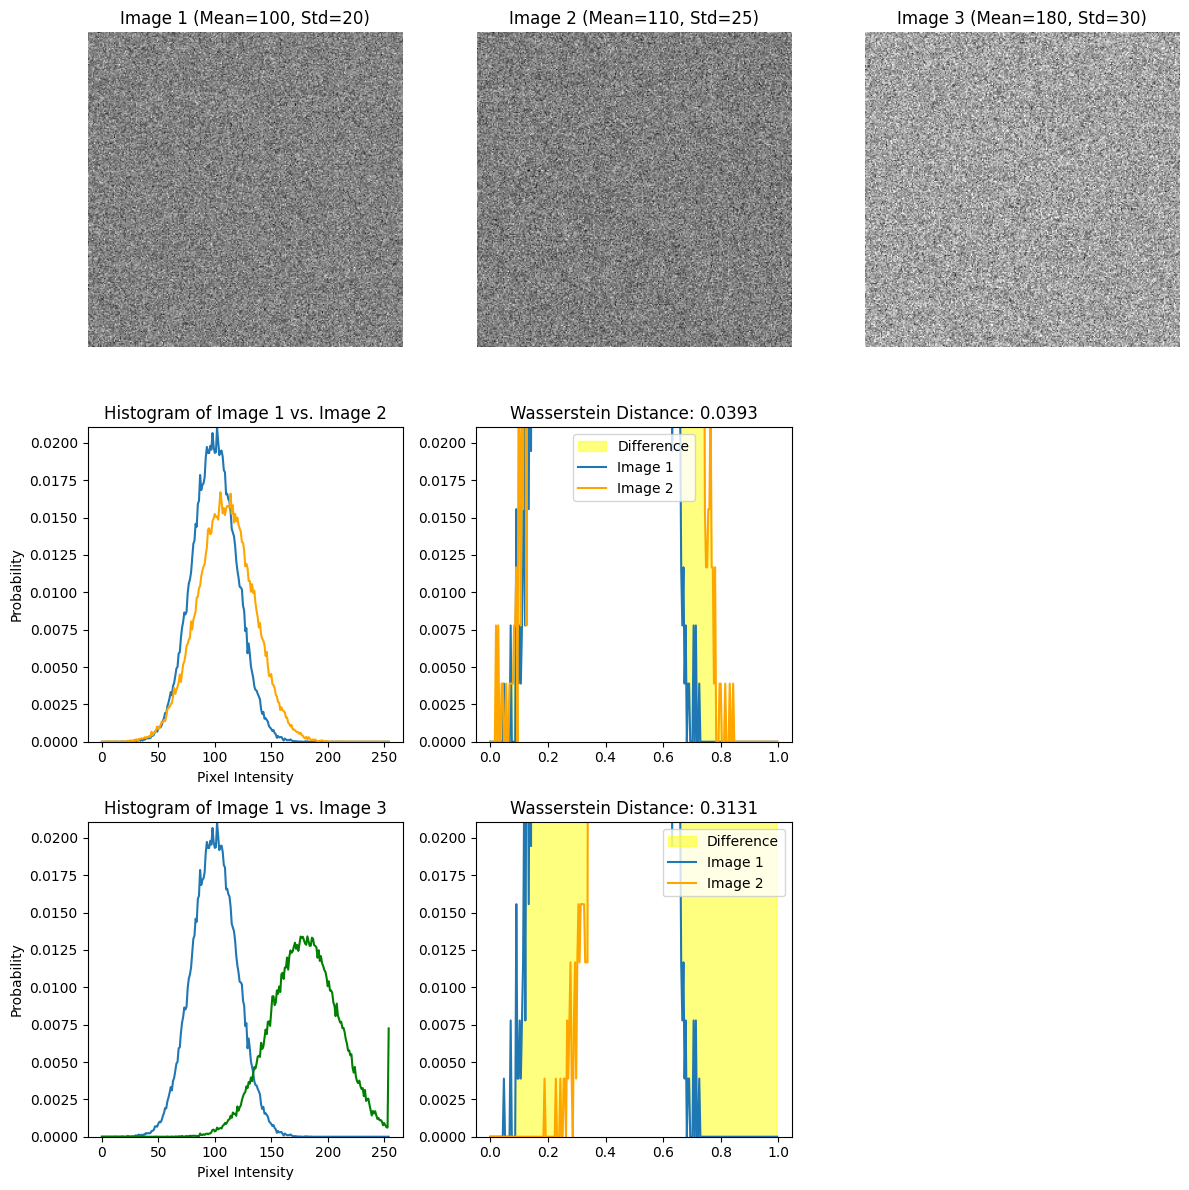

Wasserstein Distance between Image 1 and Image 2: 0.0393
Wasserstein Distance between Image 1 and Image 3: 0.3131


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

def wasserstein_histogram(img1, img2, plt_idx):
    img1_h = img1.copy()/255.
    img2_h = img2.copy()/255.
    h1, bins1 = np.histogram(img1_h.flatten(), bins=255, range=(0., 1.), density=True)
    h2, bins2 = np.histogram(img2_h.flatten(), bins=255, range=(0., 1.), density=True)
    
    # Calculate Wasserstein distance
    w_dist = wasserstein_distance(bins1[:-1], bins2[:-1], h1, h2)
    
    plt.subplot(3, 3, plt_idx)
    plt.fill_between(bins1[:-1], h1, h2, color='yellow', alpha=0.5, label='Difference')
    plt.plot(bins1[:-1], h1, label='Image 1')
    plt.plot(bins2[:-1], h2, label='Image 2', color='orange')
    plt.legend()
    
    plt.title(f"Wasserstein Distance: {w_dist:.4f}")
    return w_dist

# Function to generate an image with Gaussian noise
def generate_gaussian_image(mean, std, size=(256, 256)):
    """Generate an image with Gaussian noise."""
    return np.clip(np.random.normal(mean, std, size), 0, 255).astype(np.uint8)

# Generate three images
image1 = generate_gaussian_image(mean=100, std=20)  # Image 1: Gaussian (mean=100, std=20)
image2 = generate_gaussian_image(mean=110, std=25)  # Image 2: Gaussian (mean=110, std=25)
image3 = generate_gaussian_image(mean=180, std=30)  # Image 3: Gaussian (mean=180, std=30)

# Plot the images
plt.figure(figsize=(12, 12))
plt.subplot(3, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Image 1 (Mean=100, Std=20)")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title("Image 2 (Mean=110, Std=25)")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(image3, cmap='gray')
plt.title("Image 3 (Mean=180, Std=30)")
plt.axis('off')

# Plot the histograms
bins = np.linspace(0, 255, 256)
h1, _ = np.histogram(image1.flatten(), bins=bins, density=True)
h2, _ = np.histogram(image2.flatten(), bins=bins, density=True)
h3, _ = np.histogram(image3.flatten(), bins=bins, density=True)

plt.subplot(3, 3, 4)
plt.plot(bins[:-1], h1, label="Image 1")
plt.xlabel("Pixel Intensity")
plt.ylabel("Probability")

plt.plot(bins[:-1], h2, label="Image 2", color='orange')
plt.title("Histogram of Image 1 vs. Image 2")
y_max = np.max(np.maximum(h1, h2))
y_min = np.min(np.minimum(h1, h2))
plt.ylim(y_min, y_max)

w_dist_12 = wasserstein_histogram(image1, image2, 5)
plt.ylim(y_min, y_max)

plt.subplot(3, 3, 7)
plt.plot(bins[:-1], h1, label="Image 1")
plt.plot(bins[:-1], h3, label="Image 3", color='green')
plt.title("Histogram of Image 1 vs. Image 3")
plt.xlabel("Pixel Intensity")
plt.ylabel("Probability")
y_max = np.max(np.maximum(h1, h3))
y_min = np.min(np.minimum(h1, h3))
plt.ylim(y_min, y_max)
w_dist_13 = wasserstein_histogram(image1, image3, 8)
plt.ylim(y_min, y_max)

# Adjust layout and display
plt.tight_layout()
plt.show()

print(f"Wasserstein Distance between Image 1 and Image 2: {w_dist_12:.4f}")
print(f"Wasserstein Distance between Image 1 and Image 3: {w_dist_13:.4f}")
